# 第2回スキルトランスファー(眞田実施分)の問題回答例

## データ準備

In [22]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA, ARIMA
import numpy as np

nile = sm.datasets.nile.load_pandas().data
nile.set_index("year", inplace=True)
nile.rename(columns={"volume":"y"}, inplace=True)
elnino = sm.datasets.elnino.load_pandas().data
elnino.columns = ["YEAR", "01","02","03","04","05","06","07","08","09","10","11","12"]
elnino = elnino.melt(id_vars="YEAR", var_name="Month",value_name="y")
elnino["yearmonth"] = elnino[["YEAR", "Month"]].apply(lambda x: str(int(x[0])) + x[1], axis=1)
elnino.drop(["YEAR", "Month"], axis=1, inplace=True)
elnino.set_index("yearmonth", inplace=True)

In [23]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Nile

### Level 1 

#### 問題1　y列について、自己相関と偏自己相関のコレログラムをプロットせよ。どのようなことが言えそうか。

In [24]:
def plot_acf(y):
    plt.figure(figsize=(12,4))
    ax1 = plt.subplot(1,2,1)
    sm.graphics.tsa.plot_acf(y, ax=ax1, lags=40)
    ax2 = plt.subplot(1,2,2)
    sm.graphics.tsa.plot_pacf(y, ax=ax2, lags=40)
    plt.show()

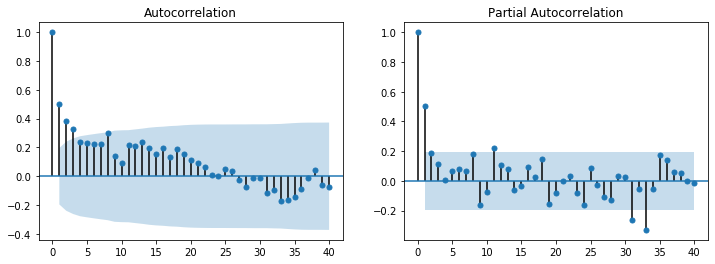

In [25]:
plot_acf(nile.y)

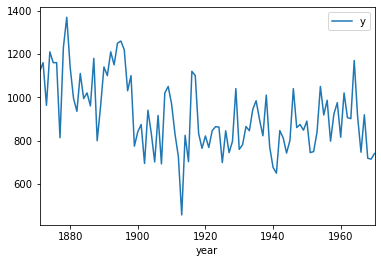

In [26]:
nile.plot() # Optional: 描画

- ラグ1について、正の自己相関を持っている。
- 自己相関はラグ4~5で小さくなっているため、グラフとあわせて見ても、定常過程と言えるだろう。

#### 問題2 　y列についてARMA(1,1)でモデリングを行い、10期先まで予測を行え。

In [33]:
m = ARMA(nile.y.values, order=(1,1))
m = m.fit()

In [34]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 1)   Log Likelihood                -637.039
Method:                       css-mle   S.D. of innovations            141.038
Date:                Tue, 25 Jun 2019   AIC                           1282.078
Time:                        13:15:40   BIC                           1292.498
Sample:                             0   HQIC                          1286.295
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        920.6986     46.665     19.730      0.000     829.237    1012.160
ar.L1.y        0.8610      0.107      8.066      0.000       0.652       1.070
ma.L1.y       -0.5177      0.191     -2.713      0.008      -0.892      -0.144
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1614           +0.0000j            1.1614            0.0000
MA.1            1.9317           +0.0000j            1.9317            0.0000
-----------------------------------------------------------------------------
"""

In [42]:
m_ARMA = ARMA(nile.y.values, order=(1, 1)).fit() # orderはp,qの順
m_ARMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 1)   Log Likelihood                -637.039
Method:                       css-mle   S.D. of innovations            141.038
Date:                Tue, 25 Jun 2019   AIC                           1282.078
Time:                        13:20:30   BIC                           1292.498
Sample:                             0   HQIC                          1286.295
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        920.6986     46.665     19.730      0.000     829.237    1012.160
ar.L1.y        0.8610      0.107      8.066      0.000       0.652       1.070
ma.L1.y       -0.5177      0.191     -2.713      0.008      -0.892      -0.144
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1614           +0.0000j            1.1614            0.0000
MA.1            1.9317           +0.0000j            1.9317            0.0000
-----------------------------------------------------------------------------
"""

In [35]:
def pred_model(model, y_train, forward=10):
    n = len(y_train)
    return model.predict(end=n+forward-1) # 0インデックスなので1を引く

In [36]:
len(nile.y.values)

100

In [38]:
nile.reset_index().tail()

,year,y
95,1966.0,746.0
96,1967.0,919.0
97,1968.0,718.0
98,1969.0,714.0
99,1970.0,740.0


In [40]:
m.predict(end = 99 + 19)

array([808.10217468, 800.3661697 , 817.08835238, 831.48671162,
       843.88418108, 854.55881742, 863.75003677, 871.66398441,
       878.47815833, 884.34539027, 889.39727343])

In [43]:
pred_nile_ARMA_1_1 = pred_model(m_ARMA, nile.y.values)
pred_nile_ARMA_1_1[:10]

array([ 920.69863125, 1021.4349069 , 1060.56603402, 1006.60289149,
       1065.07268368, 1077.67442504, 1084.14339871,  968.31731906,
       1051.55344289, 1142.7100807 ])

In [45]:
import matplotlib.pyplot as plt

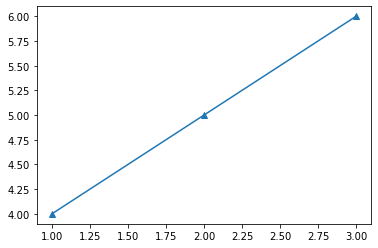

In [51]:
plt.plot([1,2,3],[4,5,6], "^-")

In [53]:
nile.y.values

array([1120., 1160.,  963., 1210., 1160., 1160.,  813., 1230., 1370.,
       1140.,  995.,  935., 1110.,  994., 1020.,  960., 1180.,  799.,
        958., 1140., 1100., 1210., 1150., 1250., 1260., 1220., 1030.,
       1100.,  774.,  840.,  874.,  694.,  940.,  833.,  701.,  916.,
        692., 1020., 1050.,  969.,  831.,  726.,  456.,  824.,  702.,
       1120., 1100.,  832.,  764.,  821.,  768.,  845.,  864.,  862.,
        698.,  845.,  744.,  796., 1040.,  759.,  781.,  865.,  845.,
        944.,  984.,  897.,  822., 1010.,  771.,  676.,  649.,  846.,
        812.,  742.,  801., 1040.,  860.,  874.,  848.,  890.,  744.,
        749.,  838., 1050.,  918.,  986.,  797.,  923.,  975.,  815.,
       1020.,  906.,  901., 1170.,  912.,  746.,  919.,  718.,  714.,
        740.])

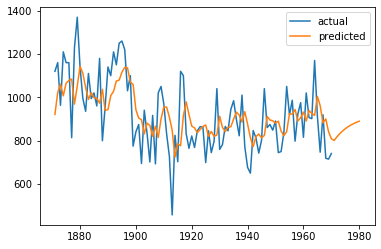

In [55]:
# Optional:描画
plt.plot(nile.index, nile.y.values, label="actual")
plt.plot(np.arange(nile.index[0], nile.index[-1]+10+1), pred_nile_ARMA_1_1, label="predicted")
plt.legend()

ちなみに、statsmodelsのpredictは、訓練(fit)に使用した期間については、ノイズ$\epsilon$を除いた値を算出するため、実際のデータ(上図青線)とpredictのデータ(上図橙線)では、訓練期間でも差異がある。

#### 問題3　yの差分に対して(1,1)でモデリングを行い、10期先まで予測を行え。(ARIMA(1,1,1)となる)

In [58]:
from statsmodels.tsa.arima_model import ARIMA

In [62]:
ARMA(np.diff(np.diff(nile.y.values)), order=(2,3))

差分
2 ar
3 ma

In [57]:
ARIMA(nile.y.values, order(2, 2, 3)).fit()

array([1120., 1160.,  963., 1210., 1160., 1160.,  813., 1230., 1370.,
       1140.,  995.,  935., 1110.,  994., 1020.,  960., 1180.,  799.,
        958., 1140., 1100., 1210., 1150., 1250., 1260., 1220., 1030.,
       1100.,  774.,  840.,  874.,  694.,  940.,  833.,  701.,  916.,
        692., 1020., 1050.,  969.,  831.,  726.,  456.,  824.,  702.,
       1120., 1100.,  832.,  764.,  821.,  768.,  845.,  864.,  862.,
        698.,  845.,  744.,  796., 1040.,  759.,  781.,  865.,  845.,
        944.,  984.,  897.,  822., 1010.,  771.,  676.,  649.,  846.,
        812.,  742.,  801., 1040.,  860.,  874.,  848.,  890.,  744.,
        749.,  838., 1050.,  918.,  986.,  797.,  923.,  975.,  815.,
       1020.,  906.,  901., 1170.,  912.,  746.,  919.,  718.,  714.,
        740.])

In [65]:
m_ARIMA = ARIMA(nile.y.values, order=(1, 1, 1)).fit()
m_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -629.819
Method:                       css-mle   S.D. of innovations            139.305
Date:                Tue, 25 Jun 2019   AIC                           1267.637
Time:                        13:48:23   BIC                           1278.018
Sample:                             1   HQIC                          1271.837
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8829      2.016     -1.430      0.156      -6.835       1.069
ar.L1.D.y      0.2707      0.118      2.302      0.024       0.040       0.501
ma.L1.D.y     -0.9055      0.058    -15.706      0.000      -1.018      -0.792
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.6938           +0.0000j            3.6938            0.0000
MA.1            1.1044           +0.0000j            1.1044            0.0000
-----------------------------------------------------------------------------
"""

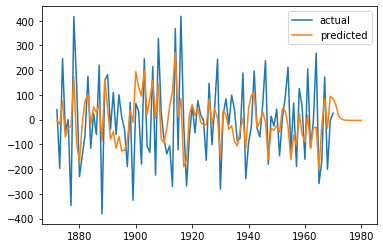

In [66]:
pred_nile_ARIMA_1_1_1 = pred_model(m_ARIMA, nile.y.values)
plt.plot(nile.index[1:], np.diff(nile.y.values), label="actual")
plt.plot(np.arange(nile.index[1], nile.index[-1]+10+1), pred_nile_ARIMA_1_1_1, label="predicted")
plt.legend()

- ARIMAモデルのpredictメソッドは、差分系列の予測値(訓練期間であれば、ノイズを取り除いた値)を返す点に注意

In [71]:
# 差分系列から元に戻す。
# 最新の値に差分系列を順に足し合わせる(累積和)。累積和はcumsumメソッドで計算できる。
pred_nile_ARIMA_1_1_1_sum = np.insert(pred_nile_ARIMA_1_1_1[0],0, 
                                             nile.y.values[-1]).cumsum()

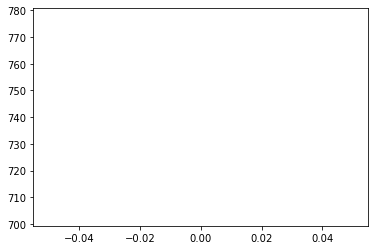

In [70]:
plt.plot(pred_nile_ARIMA_1_1_1_sum)

ValueError: x and y must have same first dimension, but have shapes (110,) and (1,)

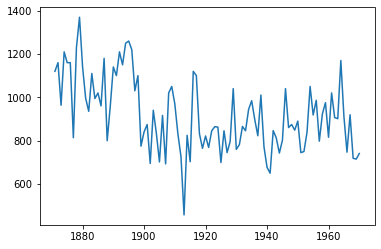

In [69]:
# Optional: 描画(将来予測部分)
plt.plot(nile.index, nile.y.values, label="actual")
plt.plot(np.arange(nile.index[0], nile.index[-1]+10+1), 
         pred_nile_ARIMA_1_1_1_sum, label="predicted")
plt.legend()

### Level 2

#### 問題 4　y列に対して、ARIMAの次数をp,qを各々0~4の範囲で動かし、5 x 5 = 25種類のモデルをBICで評価せよ。BICが最良のモデルの次数はいくつであったか。また、最良のモデルについて、予測を行え。

In [13]:
%%time
bic_matrix = np.zeros((5,5))
for p in range(5):
    for q in range(5):
        try:
            np.random.seed(0)
            m_ARMA = ARMA(nile.y.values, order=(p, q)).fit() # orderはp,qの順
            bic_matrix[p,q] = m_ARMA.bic
        except:
            bic_matrix[p,q] = None

/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

CPU times: user 13.4 s, sys: 109 ms, total: 13.5 s
Wall time: 4.8 s


/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [14]:
bic_matrix

array([[1318.24180688, 1303.25723543, 1301.89524617, 1301.75486172,
        1304.50525509],
       [1293.71982788, 1292.49824982,           nan,           nan,
                  nan],
       [1294.38322623,           nan, 1303.70272143,           nan,
                  nan],
       [1297.58618319, 1299.84717174,           nan,           nan,
        1309.01756438],
       [1302.16810875, 1306.79709006,           nan,           nan,
                  nan]])

収束していないものが多い → その次数は上手く当てはまっていないと解釈してよい

In [15]:
bic_matrix[np.isnan(bic_matrix)] = 10e10

In [16]:
np.argmin(bic_matrix)

6

In [17]:
np.unravel_index(np.argmin(bic_matrix), (5,5)) # p = 1, q = 1が最良であった。

(1, 1)

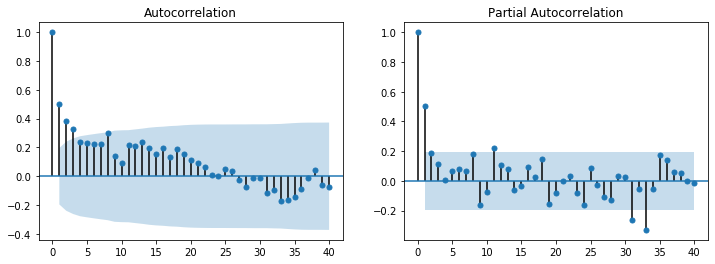

In [18]:
plot_acf(nile.y)

In [19]:
np.random.seed(0)
m_ARMA = ARMA(nile.y.values, order=(1, 1)).fit()
m_ARMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 1)   Log Likelihood                -637.039
Method:                       css-mle   S.D. of innovations            141.038
Date:                Mon, 24 Jun 2019   AIC                           1282.078
Time:                        12:37:39   BIC                           1292.498
Sample:                             0   HQIC                          1286.295
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        920.6986     46.665     19.730      0.000     829.237    1012.160
ar.L1.y        0.8610      0.107      8.066      0.000       0.652       1.070
ma.L1.y       -0.5177      0.191     -2.713      0.008      -0.892      -0.144
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1614           +0.0000j            1.1614            0.0000
MA.1            1.9317           +0.0000j            1.9317            0.0000
-----------------------------------------------------------------------------
"""

#### 問題5 　問題"3"で作成した差分のy列に対して、ARIMAの次数をp,qを各々0~4の範囲で動かし、5 x 5 = 25種類のモデルをBICで評価せよ。BICが最良のモデルの次数はいくつであったか。また、最良のモデルについて、予測を行え。

In [20]:
%%time
bic_matrix_arima = np.zeros((5,5))
for p in range(5):
    for q in range(5):
        try:
            np.random.seed(0)
            m_ARIMA = ARIMA(nile.y.values, order=(p, 1, q)).fit() # orderはp,qの順
            bic_matrix_arima[p,q] = m_ARIMA.bic
        except:
            bic_matrix_arima[p,q] = None

/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


CPU times: user 14.9 s, sys: 126 ms, total: 15 s
Wall time: 7.03 s


/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [21]:
bic_matrix_arima

array([[1303.83526308, 1278.09462354, 1278.92443228, 1282.57925274,
                  nan],
       [1291.1311262 , 1278.01752879, 1282.10990529,           nan,
                  nan],
       [1289.66261355, 1282.10712936, 1286.2110547 , 1288.61813192,
                  nan],
       [1292.92727539, 1286.6281799 , 1291.07936673, 1294.50304192,
        1292.63933987],
       [1294.55986008, 1290.74505941, 1295.17861691, 1297.44537207,
                  nan]])

In [22]:
bic_matrix_arima[np.isnan(bic_matrix_arima)] = 10e10
np.unravel_index(np.argmin(bic_matrix_arima), (5,5)) # p = 1, q = 1が最良であった。

(1, 1)

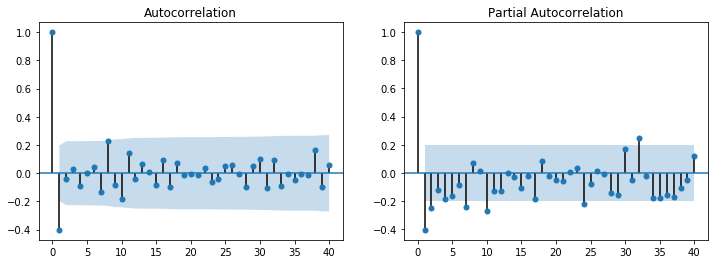

In [23]:
plot_acf(nile.diff().dropna().y)

In [24]:
np.random.seed(0)
m_ARIMA = ARIMA(nile.y.values, order=(1, 1, 1)).fit()
m_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -629.819
Method:                       css-mle   S.D. of innovations            139.305
Date:                Mon, 24 Jun 2019   AIC                           1267.637
Time:                        12:37:47   BIC                           1278.018
Sample:                             1   HQIC                          1271.837
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8829      2.016     -1.430      0.156      -6.835       1.069
ar.L1.D.y      0.2707      0.118      2.302      0.024       0.040       0.501
ma.L1.D.y     -0.9055      0.058    -15.706      0.000      -1.018      -0.792
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.6938           +0.0000j            3.6938            0.0000
MA.1            1.1044           +0.0000j            1.1044            0.0000
-----------------------------------------------------------------------------
"""

### Level 3

#### 問題6　y列について単位根の有無を検定せよ。また、単位根を持つことを棄却できなかった場合、1階の差分について単位根があるか否かを検定せよ

In [63]:
# 拡張ディッキーフラー検定("単位根がある"と仮定して、不自然な値が出れば、その仮定を棄却する)
# https://ja.wikipedia.org/wiki/拡張ディッキー–フラー検定
from statsmodels.tsa.stattools import adfuller

In [64]:
adfuller(nile.y.values)

(-4.048705096914344,
 0.001175887950387114,
 1,
 98,
 {'1%': -3.4989097606014496,
  '5%': -2.891516256916761,
  '10%': -2.5827604414827157},
 1105.1138521639623)

In [26]:
result = adfuller(nile.y.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.048705
p-value: 0.001176
Critical Values:
	1%: -3.499
	5%: -2.892
	10%: -2.583


p-value(単位根があった場合に、上記の値が出る確率)が0.001%と低いため、単位根はないと判断。

#### 問題7　問題"2", "3"で作成したモデルについて、誤差が正規分布に従うか否かを検定せよ。

In [27]:
# Jarque-Bera検定("正規分布にしたがっている"と仮定して、不自然な値が出れば、その仮定を棄却する)
# https://ja.wikipedia.org/wiki/ジャック–ベラ検定
from statsmodels.stats.stattools import jarque_bera

In [28]:
m_ARMA = ARMA(nile.y.values, order=(1, 1)).fit() # orderはp,qの順

In [29]:
m_ARMA.resid

array([ 199.30136875,  138.5650931 ,  -97.56603402,  203.39710851,
         94.92731632,   82.32557496, -271.14339871,  261.68268094,
        318.44655711,   -2.7100807 , -115.92740418, -109.6878252 ,
        120.20426307,  -27.46614866,   21.96776922,  -34.82816763,
        207.43174011, -237.58259935,   19.09628538,  197.06939977,
         92.49436726,  182.79933905,   74.83470299,  170.60561569,
        144.08092093,   81.73929101, -106.09236355,   30.26737109,
       -285.41431139, -102.13938207,  -30.0898884 , -202.06646929,
        109.89077969,  -47.42953421, -168.74047836,   97.11573306,
       -174.37811238,  205.94654596,  150.41390366,   14.83477949,
       -123.60806352, -181.45448682, -390.99188771,  101.01390236,
        -83.14502868,  344.56572318,  186.07088407, -146.7580012 ,
       -156.29977225,  -45.68907602,  -90.50707672,    8.92633053,
         13.10140491,   -3.09688024, -173.76033607,   26.10015527,
        -98.00805528,  -23.29196986,  214.61328682, -153.32017

In [30]:
result = jarque_bera(m_ARMA.resid)
print(f'Jarque-Bera statistic: {result[0]:f}')
print(f'p-value: {result[1]:f}')
print(f"Estimated skewness: {result[2]:f}")
print(f"Estimated kurtosis: {result[3]:f}")

Jarque-Bera statistic: 0.499942
p-value: 0.778823
Estimated skewness: 0.097506
Estimated kurtosis: 2.713720


p値(誤差が正規分布であった場合に上記の値が出る確率)は78%なので、正規分布であるという仮定は棄却されない。  
⇒ "正規分布でない"とは言えない   
⇒ 正規分布という前提で進めてしまってOK  

In [31]:
m_ARIMA = ARIMA(nile.y.values, order=(1, 1, 1)).fit() # orderはp,d, qの順
result = jarque_bera(m_ARIMA.resid)
print(f'Jarque-Bera statistic: {result[0]:f}')
print(f'p-value: {result[1]:f}')
print(f"Estimated skewness: {result[2]:f}")
print(f"Estimated kurtosis: {result[3]:f}")

Jarque-Bera statistic: 0.369809
p-value: 0.831183
Estimated skewness: -0.149229
Estimated kurtosis: 2.976061


p値(誤差が正規分布であった場合に上記の値が出る確率)は83%なので、正規分布であるという仮定は棄却されない。  
⇒ "正規分布でない"とは言えない  
⇒ 正規分布という前提で進めてしまってOK

#### 問題8　問題"2", "3"で作成したモデルについて、誤差に自己相関があるか否かを検定せよ。

In [32]:
# Box-Ljung検定(残差に自己相関があると仮定して、もし不自然な値が出れば、その仮定を棄却する)
# https://ja.wikipedia.org/wiki/リュング・ボックス検定
from statsmodels.stats.diagnostic import acorr_ljungbox

In [33]:
result = acorr_ljungbox(m_ARMA.resid)

Text(0.5, 0, 'lag')

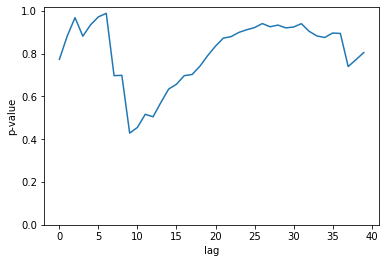

In [34]:
plt.plot(result[1])
plt.ylim(0,)
plt.ylabel("p-value")
plt.xlabel("lag")

p値(誤差に自己相関がない場合に上記の値が出る確率)は少なくとも40%以上なので、自己相関がないという仮定は棄却されない。  
⇒ "自己相関がある"とは言えない   
⇒ 自己相関がないという前提で進めてしまってOK  

Text(0.5, 0, 'lag')

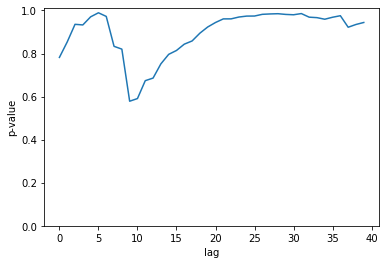

In [35]:
result = acorr_ljungbox(m_ARIMA.resid)
plt.plot(result[1])
plt.ylim(0,)
plt.ylabel("p-value")
plt.xlabel("lag")

p値(誤差に自己相関がない場合に上記の値が出る確率)は少なくとも50%以上なので、自己相関がないという仮定は棄却されない。  
⇒ "自己相関がある"とは言えない  
⇒ 自己相関がないという前提で進めてしまってOK

## Elnino

### Level 1

####  問題1　y列について、自己相関と偏自己相関のコレログラムをプロットせよ。どのようなことが言えそうか。

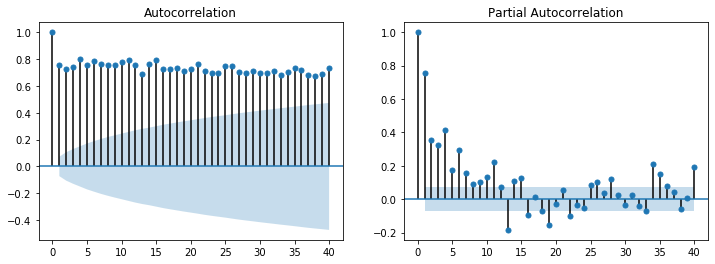

In [36]:
plot_acf(elnino.y)

短期的にはかなり自己相関が大きく、非定常である可能性が高い。

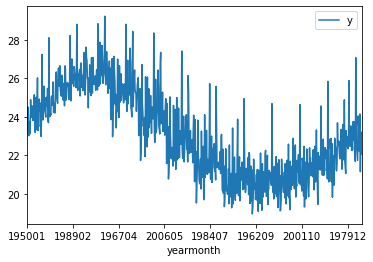

In [37]:
elnino.plot()

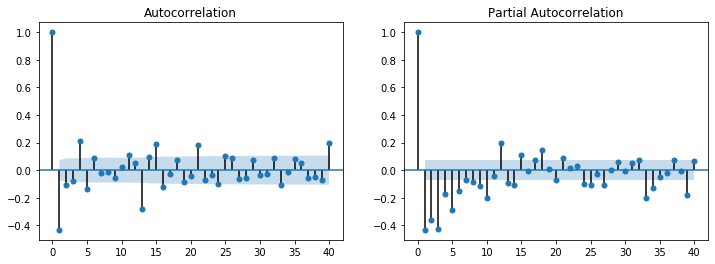

In [38]:
plot_acf(np.diff(elnino.y))

差分を取ると、定常仮定と言えそう。差分系列については、負の自己相関が見られる。

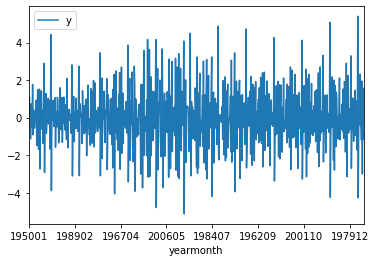

In [39]:
elnino.diff().plot()

#### 問題2 　y列についてARMA(1,1)でモデリングを行い、10期先まで予測を行え。

In [40]:
m_ARMA = ARMA(elnino.y.values, (1,1)).fit()

In [41]:
pred_elnino_ARMA_1_1 = pred_model(m_ARMA, elnino.y.values)
pred_elnino_ARMA_1_1[:10]

array([23.23800599, 23.14892043, 23.57901821, 23.85762992, 23.9247387 ,
       23.74411769, 23.74376726, 23.66405969, 23.58647673, 23.76017505])

In [42]:
m_ARMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  732
Model:                     ARMA(1, 1)   Log Likelihood               -1140.498
Method:                       css-mle   S.D. of innovations              1.147
Date:                Mon, 24 Jun 2019   AIC                           2288.995
Time:                        12:37:49   BIC                           2307.378
Sample:                             0   HQIC                          2296.087
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.2380      1.180     19.698      0.000      20.926      25.550
ar.L1.y        0.9973      0.002    487.884      0.000       0.993       1.001
ma.L1.y       -0.8943      0.015    -60.515      0.000      -0.923      -0.865
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0027           +0.0000j            1.0027            0.0000
MA.1            1.1182           +0.0000j            1.1182            0.0000
-----------------------------------------------------------------------------
"""

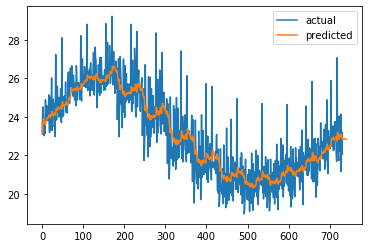

In [43]:
# Optional:描画
plt.plot(np.arange(elnino.shape[0]),elnino.y.values, label="actual")
plt.plot(np.arange(elnino.shape[0]+10), pred_elnino_ARMA_1_1, label="predicted")
plt.legend()

(632, 742)

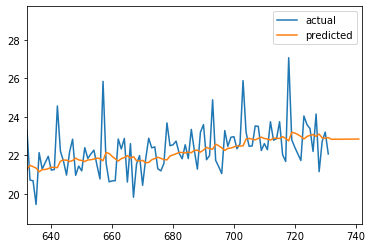

In [44]:
plt.plot(np.arange(elnino.shape[0]),elnino.y.values, label="actual")
plt.plot(np.arange(elnino.shape[0]+10), pred_elnino_ARMA_1_1, label="predicted")
plt.legend()
plt.xlim(elnino.shape[0]-100, elnino.shape[0]+10)

####  問題3　yの差分に対して(1,1)でモデリングを行い、10期先まで予測を行え。(ARIMA(1,1,1)となる)

In [45]:
m_ARIMA = ARIMA(elnino.y.values, (1,1,1)).fit()
m_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  731
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1138.791
Method:                       css-mle   S.D. of innovations              1.148
Date:                Mon, 24 Jun 2019   AIC                           2285.583
Time:                        12:37:49   BIC                           2303.961
Sample:                             1   HQIC                          2292.673
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.005     -0.342      0.733      -0.010       0.007
ar.L1.D.y     -0.0370      0.040     -0.923      0.357      -0.116       0.042
ma.L1.D.y     -0.8899      0.016    -54.866      0.000      -0.922      -0.858
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -27.0284           +0.0000j           27.0284            0.5000
MA.1            1.1238           +0.0000j            1.1238            0.0000
-----------------------------------------------------------------------------
"""

In [46]:
pred_elnino_ARIMA_1_1_1 = pred_model(m_ARIMA, elnino.y.values)
pred_elnino_ARIMA_1_1_1[:10]

array([-0.00155781, -0.55894475, -0.59283966, -0.15150485,  0.80490218,
        0.03216761,  0.46830273,  0.4918397 , -1.15305831, -0.16900825])

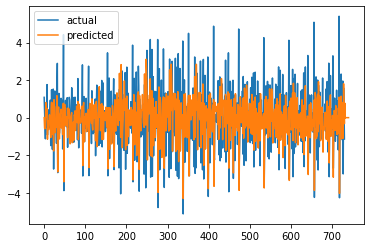

In [47]:
# Optional:描画
plt.plot(np.arange(elnino.shape[0]-1),elnino.diff().y.values[1:], label="actual")
plt.plot(np.arange(elnino.shape[0]+10-1), pred_elnino_ARIMA_1_1_1, label="predicted")
plt.legend()

(631, 741)

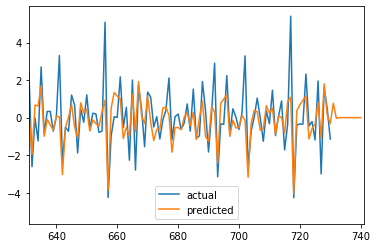

In [48]:
# Optional:描画
plt.plot(np.arange(elnino.shape[0]-1),elnino.diff().y.values[1:], label="actual")
plt.plot(np.arange(elnino.shape[0]+10-1), pred_elnino_ARIMA_1_1_1, label="predicted")
plt.legend()
plt.xlim(elnino.shape[0]-100-1, elnino.shape[0]+10-1)

In [2]:
# optional
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [5]:
m_SARIMA = SARIMAX(elnino.y.values, order=(1,1,0), seasonal_order=(0,1,0,12)).fit()

In [6]:
m_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  732
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -1525.005
Date:                            Tue, 25 Jun 2019   AIC                           3054.010
Time:                                    10:55:39   BIC                           3063.166
Sample:                                         0   HQIC                          3057.545
                                            - 732                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3656      0.032    -11.557      0.000      -0.428      -0.304
sigma2         4.0712      0.179     22.699      0.000       3.720       4.423
===================================================================================
Ljung-Box (Q):                     1308.69   Jarque-Bera (JB):                25.31
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                            -0.04
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
pred_sarima = pred_model(m_SARIMA, elnino.y.values)
pred_sarima[:12] = None

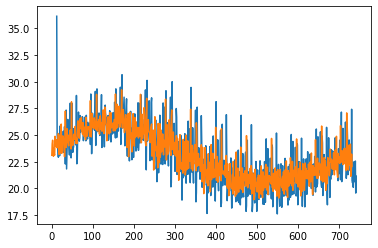

In [18]:
plt.plot(pred_sarima)
plt.plot(elnino.y.values)

(632, 732)

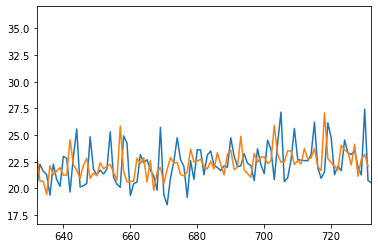

In [20]:
plt.plot(pred_sarima)
plt.plot(elnino.y.values)
plt.xlim(elnino.shape[0]-100, elnino.shape[0])

### Level 2

#### 問題 4　y列に対して、ARIMAの次数をp,qを各々0~4の範囲で動かし、5 x 5 = 25種類のモデルをBICで評価せよ。BICが最良のモデルの次数はいくつであったか。また、最良のモデルについて、予測を行え。

In [49]:
%%time
bic_matrix = np.zeros((5,5))
for p in range(5):
    for q in range(5):
        try:
            np.random.seed(0)
            m_ARMA = ARMA(elnino.y.values, order=(p, q)).fit() # orderはp,qの順
            bic_matrix[p,q] = m_ARMA.bic
        except:
            bic_matrix[p,q] = None

CPU times: user 25.2 s, sys: 183 ms, total: 25.4 s
Wall time: 13.1 s


/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [50]:
bic_matrix

array([[3274.0503713 , 2967.60998548, 2827.01459426, 2800.40806196,
        2689.71088801],
       [2658.688811  , 2307.37818646, 2312.45371939, 2285.5930954 ,
        2267.52498973],
       [2566.80486158, 2313.10166174, 2282.84323181,           nan,
        2262.17103862],
       [2492.94344322, 2292.66066254, 2276.10770801,           nan,
        2268.62648437],
       [2366.88014179, 2275.36967357, 2274.53078671, 2279.12948609,
        2240.26291157]])

In [51]:
bic_matrix[np.isnan(bic_matrix)] = 10e10
np.unravel_index(np.argmin(bic_matrix), (5,5)) # p = 4, q = 4が最良であった。

(4, 4)

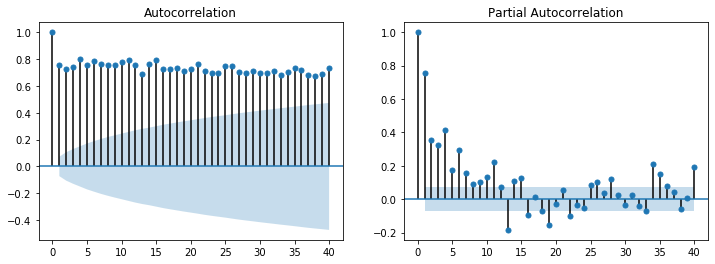

In [52]:
plot_acf(elnino.y)

In [53]:
m_ARMA = ARMA(elnino.y, (4,4)).fit()
m_ARMA.summary()

/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  732
Model:                     ARMA(4, 4)   Log Likelihood               -1087.153
Method:                       css-mle   S.D. of innovations              1.061
Date:                Mon, 24 Jun 2019   AIC                           2194.305
Time:                        12:38:11   BIC                           2240.263
Sample:                             0   HQIC                          2212.034
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.1091      1.005     23.003      0.000      21.140      25.078
ar.L1.y        0.4625      0.061      7.629      0.000       0.344       0.581
ar.L2.y        0.4235      0.030     14.005      0.000       0.364       0.483
ar.L3.y        0.6426      0.032     20.176      0.000       0.580       0.705
ar.L4.y       -0.5357      0.057     -9.325      0.000      -0.648      -0.423
ma.L1.y       -0.4024      0.046     -8.696      0.000      -0.493      -0.312
ma.L2.y       -0.5188      0.021    -24.526      0.000      -0.560      -0.477
ma.L3.y       -0.6657      0.016    -41.308      0.000      -0.697      -0.634
ma.L4.y        0.8028      0.043     18.734      0.000       0.719       0.887
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6890           -0.8400j            1.0865           -0.3593
AR.2           -0.6890           +0.8400j            1.0865            0.3593
AR.3            1.0065           -0.0000j            1.0065           -0.0000
AR.4            1.5712           -0.0000j            1.5712           -0.0000
MA.1           -0.6679           -0.7443j            1.0000           -0.3664
MA.2           -0.6679           +0.7443j            1.0000            0.3664
MA.3            1.0825           -0.2717j            1.1160           -0.0391
MA.4            1.0825           +0.2717j            1.1160            0.0391
-----------------------------------------------------------------------------
"""

#### 問題5 　問題"3"で作成した差分のy列に対して、ARIMAの次数をp,qを各々0~4の範囲で動かし、5 x 5 = 25種類のモデルをBICで評価せよ。BICが最良のモデルの次数はいくつであったか。また、最良のモデルについて、予測を行え。

In [54]:
%%time
bic_matrix_arima = np.zeros((5,5))
for p in range(5):
    for q in range(5):
        try:
            np.random.seed(0)
            m_ARIMA = ARIMA(elnino.y.values, order=(p, 1, q)).fit() # orderはp,qの順
            bic_matrix_arima[p,q] = m_ARIMA.bic
        except:
            bic_matrix_arima[p,q] = None

CPU times: user 31.4 s, sys: 260 ms, total: 31.7 s
Wall time: 19.2 s


In [55]:
bic_matrix_arima

array([[2743.25593457, 2298.21297927, 2303.33501476,           nan,
                  nan],
       [2597.83954201, 2303.96053791, 2275.05648048,           nan,
        2253.61589206],
       [2503.08352088, 2283.65093878, 2267.81260388,           nan,
        2259.99867067],
       [2365.16694599, 2266.51083869, 2265.59626951, 2270.30214934,
        2232.31738137],
       [2349.80373927, 2271.97630289, 2271.70271487, 2268.26209574,
        2237.69211239]])

In [56]:
bic_matrix_arima[np.isnan(bic_matrix_arima)] = 10e10
np.unravel_index(np.argmin(bic_matrix_arima), (5,5)) # p = 3, q = 4が最良であった。

(3, 4)

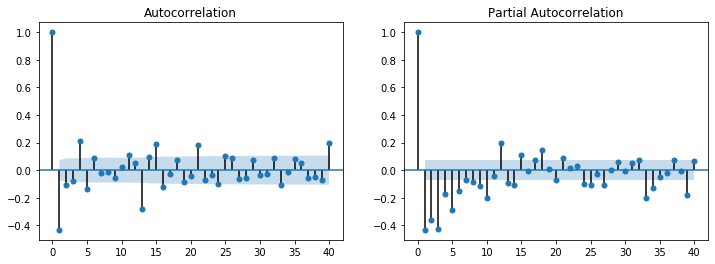

In [57]:
plot_acf(np.diff(elnino.y))

In [58]:
m_ARIMA = ARIMA(elnino.y.values, (3,1,4)).fit()
m_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  731
Model:                 ARIMA(3, 1, 4)   Log Likelihood               -1086.484
Method:                       css-mle   S.D. of innovations              1.063
Date:                Mon, 24 Jun 2019   AIC                           2190.968
Time:                        12:38:38   BIC                           2232.317
Sample:                             1   HQIC                          2206.920
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.007     -0.189      0.850      -0.016       0.013
ar.L1.D.y     -0.5419      0.061     -8.813      0.000      -0.662      -0.421
ar.L2.D.y     -0.1173      0.075     -1.569      0.117      -0.264       0.029
ar.L3.D.y      0.5294      0.058      9.092      0.000       0.415       0.644
ma.L1.D.y     -0.3952      0.047     -8.360      0.000      -0.488      -0.303
ma.L2.D.y     -0.5167      0.022    -23.981      0.000      -0.559      -0.474
ma.L3.D.y     -0.6684      0.016    -41.150      0.000      -0.700      -0.637
ma.L4.D.y      0.7954      0.044     18.185      0.000       0.710       0.881
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6890           -0.8403j            1.0867           -0.3593
AR.2           -0.6890           +0.8403j            1.0867            0.3593
AR.3            1.5996           -0.0000j            1.5996           -0.0000
MA.1           -0.6679           -0.7443j            1.0000           -0.3664
MA.2           -0.6679           +0.7443j            1.0000            0.3664
MA.3            1.0881           -0.2707j            1.1212           -0.0388
MA.4            1.0881           +0.2707j            1.1212            0.0388
-----------------------------------------------------------------------------
"""

### Level 3

#### 問題6　y列について単位根の有無を検定せよ。また、単位根を持つことを棄却できなかった場合、1階の差分について単位根があるか否かを検定せよ

In [59]:
result = adfuller(elnino.y.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.296271
p-value: 0.630877
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


単位根を棄却できない

In [60]:
result = adfuller(elnino.diff().y.values[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.824292
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


差分については、単位根があるという仮説を棄却できる

#### 問題7　問題"2", "3"で作成したモデルについて、誤差が正規分布に従うか否かを検定せよ。

In [61]:
result = jarque_bera(m_ARMA.resid)
print(f'Jarque-Bera statistic: {result[0]:f}')
print(f'p-value: {result[1]:f}')
print(f"Estimated skewness: {result[2]:f}")
print(f"Estimated kurtosis: {result[3]:f}")

Jarque-Bera statistic: 167.039600
p-value: 0.000000
Estimated skewness: 0.738116
Estimated kurtosis: 4.815888


In [62]:
result = jarque_bera(m_ARIMA.resid)
print(f'Jarque-Bera statistic: {result[0]:f}')
print(f'p-value: {result[1]:f}')
print(f"Estimated skewness: {result[2]:f}")
print(f"Estimated kurtosis: {result[3]:f}")

Jarque-Bera statistic: 170.748091
p-value: 0.000000
Estimated skewness: 0.742406
Estimated kurtosis: 4.844258


どちらも正規分布にしたがっていない ⇒ モデルの前提が崩れているため、モデルとしては不適切。

#### 問題8　問題"2", "3"で作成したモデルについて、誤差に自己相関があるか否かを検定せよ。

Text(0.5, 0, 'lag')

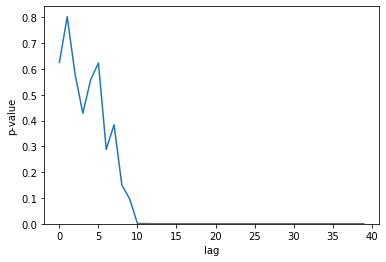

In [63]:
result = acorr_ljungbox(m_ARMA.resid)
plt.plot(result[1])
plt.ylim(0,)
plt.ylabel("p-value")
plt.xlabel("lag")

Text(0.5, 0, 'lag')

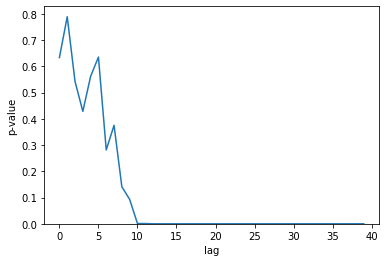

In [64]:
result = acorr_ljungbox(m_ARIMA.resid)
plt.plot(result[1])
plt.ylim(0,)
plt.ylabel("p-value")
plt.xlabel("lag")

どちらも誤差に"自己相関がない"という仮説が棄却される -> 誤差に自己相関がある -> モデルの前提が崩れるため、モデルとしては不適切。